# Bike Sharing Demand Prediction

##### **Project Type**    -  Regression
##### **Contribution**    - Individual
##### **Name -**   Shrikant Narayan Patole.



# **Project Summary**

Currently Rental bikes are introduced in many urban cities for the enhancement of
mobility comfort. It is important to make the rental bike available and accessible to
the public at the right time as it lessens the waiting time. Eventually, providing the
city with a stable supply of rental bikes becomes a major concern. The crucial part
is the prediction of bike count required at each hour for the stable supply of rental
bikes.

# **Github Link**

# **Problem Statement**

Currently Rental bikes are introduced in many urban cities for the enhancement of
mobility comfort. It is important to make the rental bike available and accessible to
the public at the right time as it lessens the waiting time. Eventually, providing the
city with a stable supply of rental bikes becomes a major concern. The crucial part
is the prediction of bike count required at each hour for the stable supply of rental
bikes.

## **1. Know Your Data**

### **Importing Libraries**

In [94]:
#importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Importing the dataset 
dataset=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [96]:
#Initial overview of data
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [97]:
dataset.shape

(8760, 14)

### Variable Description


**Date**	- Date the Bike was rented

**Rented Bike count** - Total no of rentals

**Hour** - total hours count of the day

**Temperature(°C)**	- Temperature in °C

**Humidity(%)**	- Humidity in %

**Wind speed (m/s)** - Wind speed in m/s

**Visibility (10m)** - Visibility within 10 𝑚 range

**Dew point temperature(°C)** - Dew Point Temperature in °C

**Solar Radiation (MJ/m2)**	- light and energy that comes from the sun in MJ/m2

**Rainfall(mm)**	-Rain fall in mm

**Snowfall (cm)**	-Snow fall in cm

**Seasons**	- Autumn, Spring, Summer, Winter

**Holiday**	-Whether the day is considered a holiday

**Functioning Day**	-Whether the day is neither a weekend nor holiday

In [98]:
#Renaming the columns for better understanding
dataset.rename(columns={'Rented Bike Count': 'Rented_bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)': 'Windspeed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_temp','Solar Radiation (MJ/m2)':'SolarRadiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_day'}, inplace=True)

In [99]:
#Checking null values count and datatype of each feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8760 non-null   object 
 1   Rented_bike_count  8760 non-null   int64  
 2   Hour               8760 non-null   int64  
 3   Temperature        8760 non-null   float64
 4   Humidity           8760 non-null   int64  
 5   Windspeed          8760 non-null   float64
 6   Visibility         8760 non-null   int64  
 7   Dew_temp           8760 non-null   float64
 8   SolarRadiation     8760 non-null   float64
 9   Rainfall           8760 non-null   float64
 10  Snowfall           8760 non-null   float64
 11  Seasons            8760 non-null   object 
 12  Holiday            8760 non-null   object 
 13  Functioning_day    8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ KB


In [100]:
#Changing the 'Date' column to datetime datatype
dataset['Date'] = pd.to_datetime(dataset['Date']) 
dataset['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [101]:
#Separating the Year,Month and date from datetime 
dataset['Day']=dataset['Date'].dt.day
dataset['WeekDay']=dataset["Date"].dt.day_name() 
dataset['Month']=dataset['Date'].dt.month
dataset['Year']=dataset['Date'].dt.year

#dropping the date column
dataset.drop(columns=['Date','Day'],inplace=True)

In [102]:
#Detailed stats of data
dataset.describe(include='all')

,Rented_bike_count,Hour,Temperature,Humidity,Windspeed,Visibility,Dew_temp,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,WeekDay,Month,Year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760,8760.000000,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes,Sunday,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,1296,NaN,NaN
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,NaN,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,NaN,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,2018.000000


In [103]:
#Duplicates and null values
len(dataset[dataset.duplicated()])

0

In [104]:
#checking null values in the data
dataset.isnull().sum()

Rented_bike_count    0
Hour                 0
Temperature          0
Humidity             0
Windspeed            0
Visibility           0
Dew_temp             0
SolarRadiation       0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_day      0
WeekDay              0
Month                0
Year                 0
dtype: int64

In [105]:
# There are some values with 0 humidity which is practically impossible
print(dataset['Humidity'].value_counts()[0])
#dropping rows with 0 value of humidity
dataset=dataset.drop(dataset[dataset['Humidity'] == 0].index)

17


In [106]:
#Checking the value count of days are functional or not
print(dataset['Functioning_day'].value_counts())
#Bikes are rented on non-functioning days? 
dataset.groupby('Functioning_day').max()['Rented_bike_count']

Yes    8448
No      295
Name: Functioning_day, dtype: int64


Functioning_day
No        0
Yes    3556
Name: Rented_bike_count, dtype: int64

In [107]:
#As we see above bikes are not rented on nonfunctioning days,so we drop the rows without functioning days 
dataset=dataset.drop(dataset[dataset['Functioning_day'] == 'No'].index)
#as all remaining rows are functional days,we drop the column
dataset=dataset.drop(['Functioning_day'], axis = 1)

# Exploratory Data Analysis

#### 1.Bikes demand on Holidays and Non Holidays

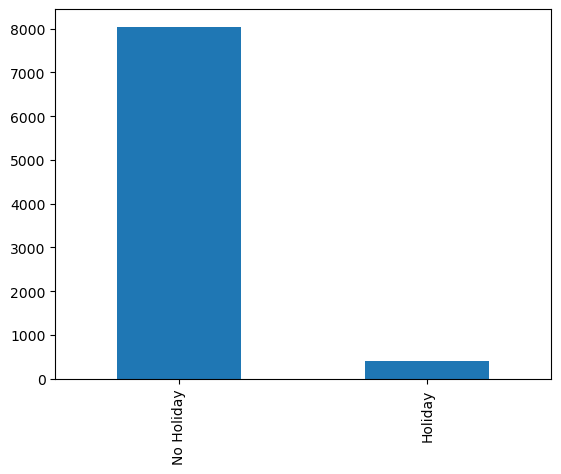

In [108]:
holiday_demand=dataset['Holiday'].value_counts().plot(kind='bar',y='Rented_bike_count')

**Observation:** The demand for bikes is very low on holidays.The company receives approximately only 5% of all orders during holidays.Almost 95% of orders received are on non-holidays.  

#### 2. Lets see the no of bikes rented depending on the time of the day

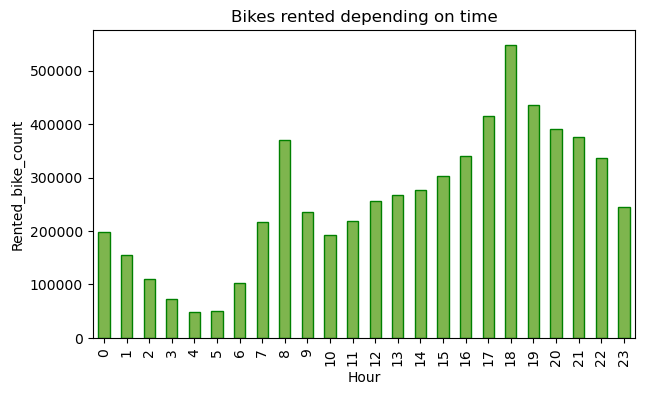

In [109]:

Rents_by_hour=dataset.groupby('Hour')['Rented_bike_count'].sum()
plt.figure(figsize=(7,4))
Rents_by_hour.plot(kind='bar',color='#7eb54e',edgecolor='green')
plt.xlabel('Hour')
plt.ylabel('Rented_bike_count')
plt.title('Bikes rented depending on time')
plt.show()


**Observation:** As we can see above,more number of bikes are rented during morning time and evening time.At morning 8 AM we see most bikes rented and then as noon passes we start to see the demand increased during evening time.The demand is low during Midnight time

#### 3. Total bikes rented on each day of week

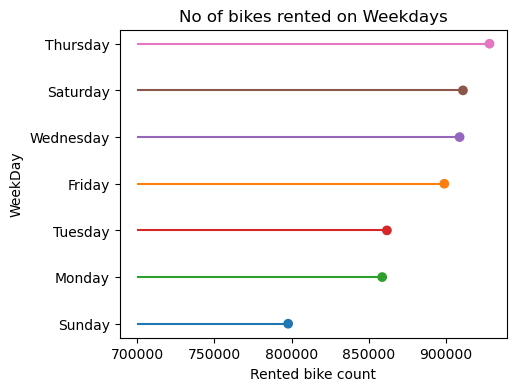

In [110]:

Rents_by_day=dataset.groupby('WeekDay')['Rented_bike_count'].sum().reset_index().sort_values(by='Rented_bike_count')
plt.figure(figsize=(5,4))
colour=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2']
plt.hlines(y='WeekDay', xmin=700000, xmax='Rented_bike_count', color=colour,data=Rents_by_day)
plt.title('No of bikes rented on Weekdays')
plt.ylabel('WeekDay')
plt.xlabel('Rented bike count')
plt.scatter('Rented_bike_count','WeekDay',data=Rents_by_day,c=colour)


**Observation:** 
- The demand for bikes is higher on Thursday,Wednesday and Friday of the working days.As for weekends,people prefer to use bike on satureday only.
- Demand for bikes is less on sunday because of weekend.Monday and Tuesday we can say that people are starting their week so maybe because of working days,we see low demand on Monday and Tuesday.  

#### 4.Relation between Weekday and hour the bikes are rented for the demand

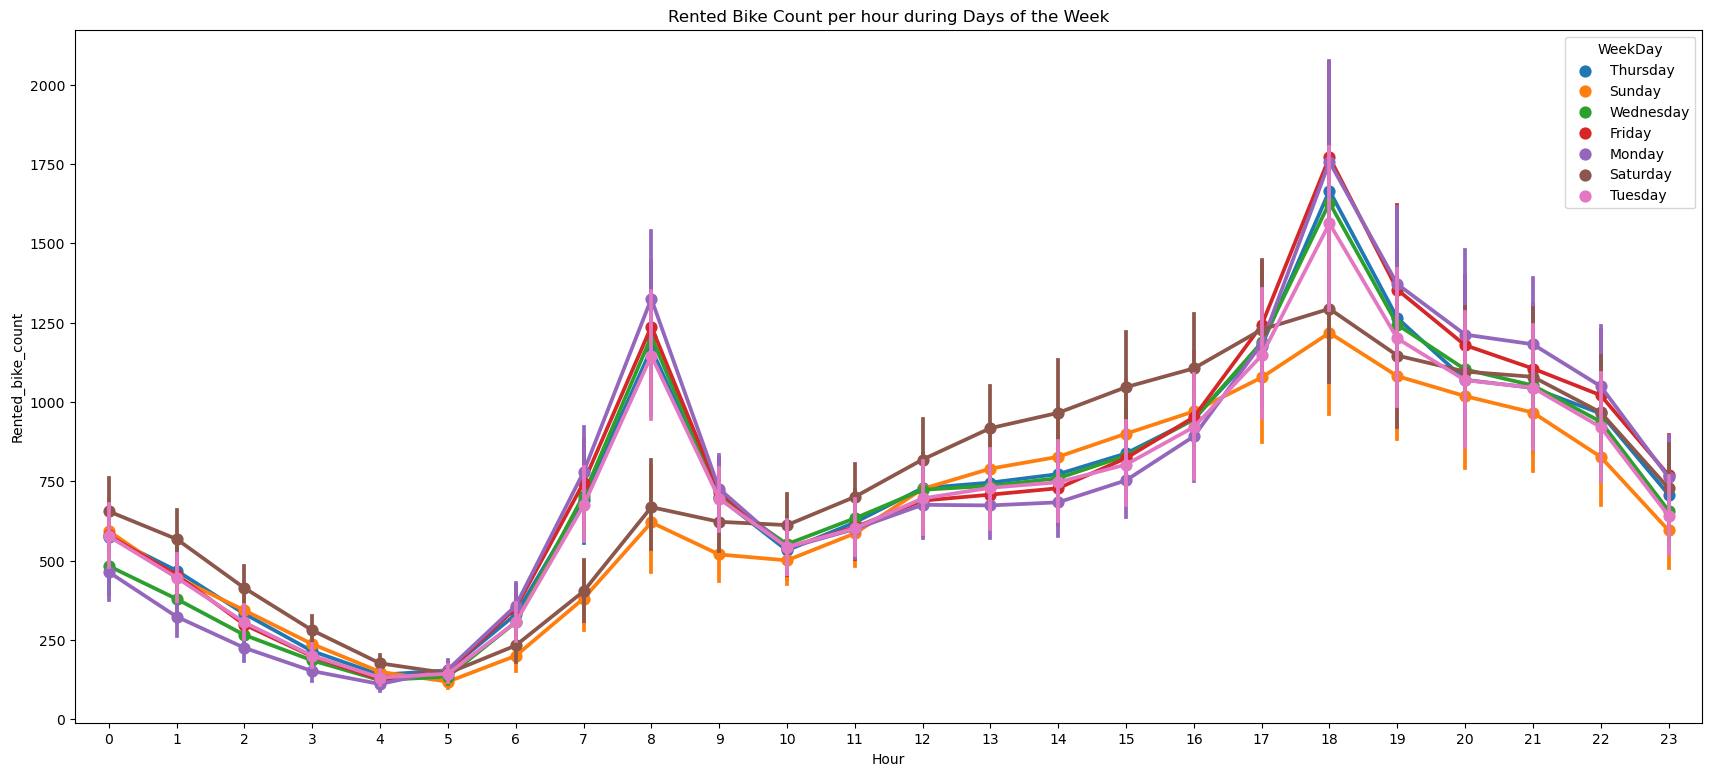

In [111]:

fig,ax=plt.subplots(figsize=(21,9))
sns.pointplot(x='Hour',y='Rented_bike_count',hue='WeekDay',data = dataset,ax=ax)
ax.set(title ='Rented Bike Count per hour during Days of the Week')
plt.show()


**Observation:**
- For Weekdays,The demand for bikes is very high during 6AM to 9AM,then we see slow demand for bikes during 11AM to 4PM because of working hours and higher temperature during noon time.Then as working hours end and temperature decreases we see sudden rise in demands of bikes from 4PM to 10PM.As the midnight closes we see reducing demand for bikes.
- For weekends,we see a gradually increasing demand on saturday irrespective of the time of the day,but number of bikes rented are comparatively low on weekends.Sunday is less preferred day by customer because of weekend holiday.

#### 5. Demands of bike for each month

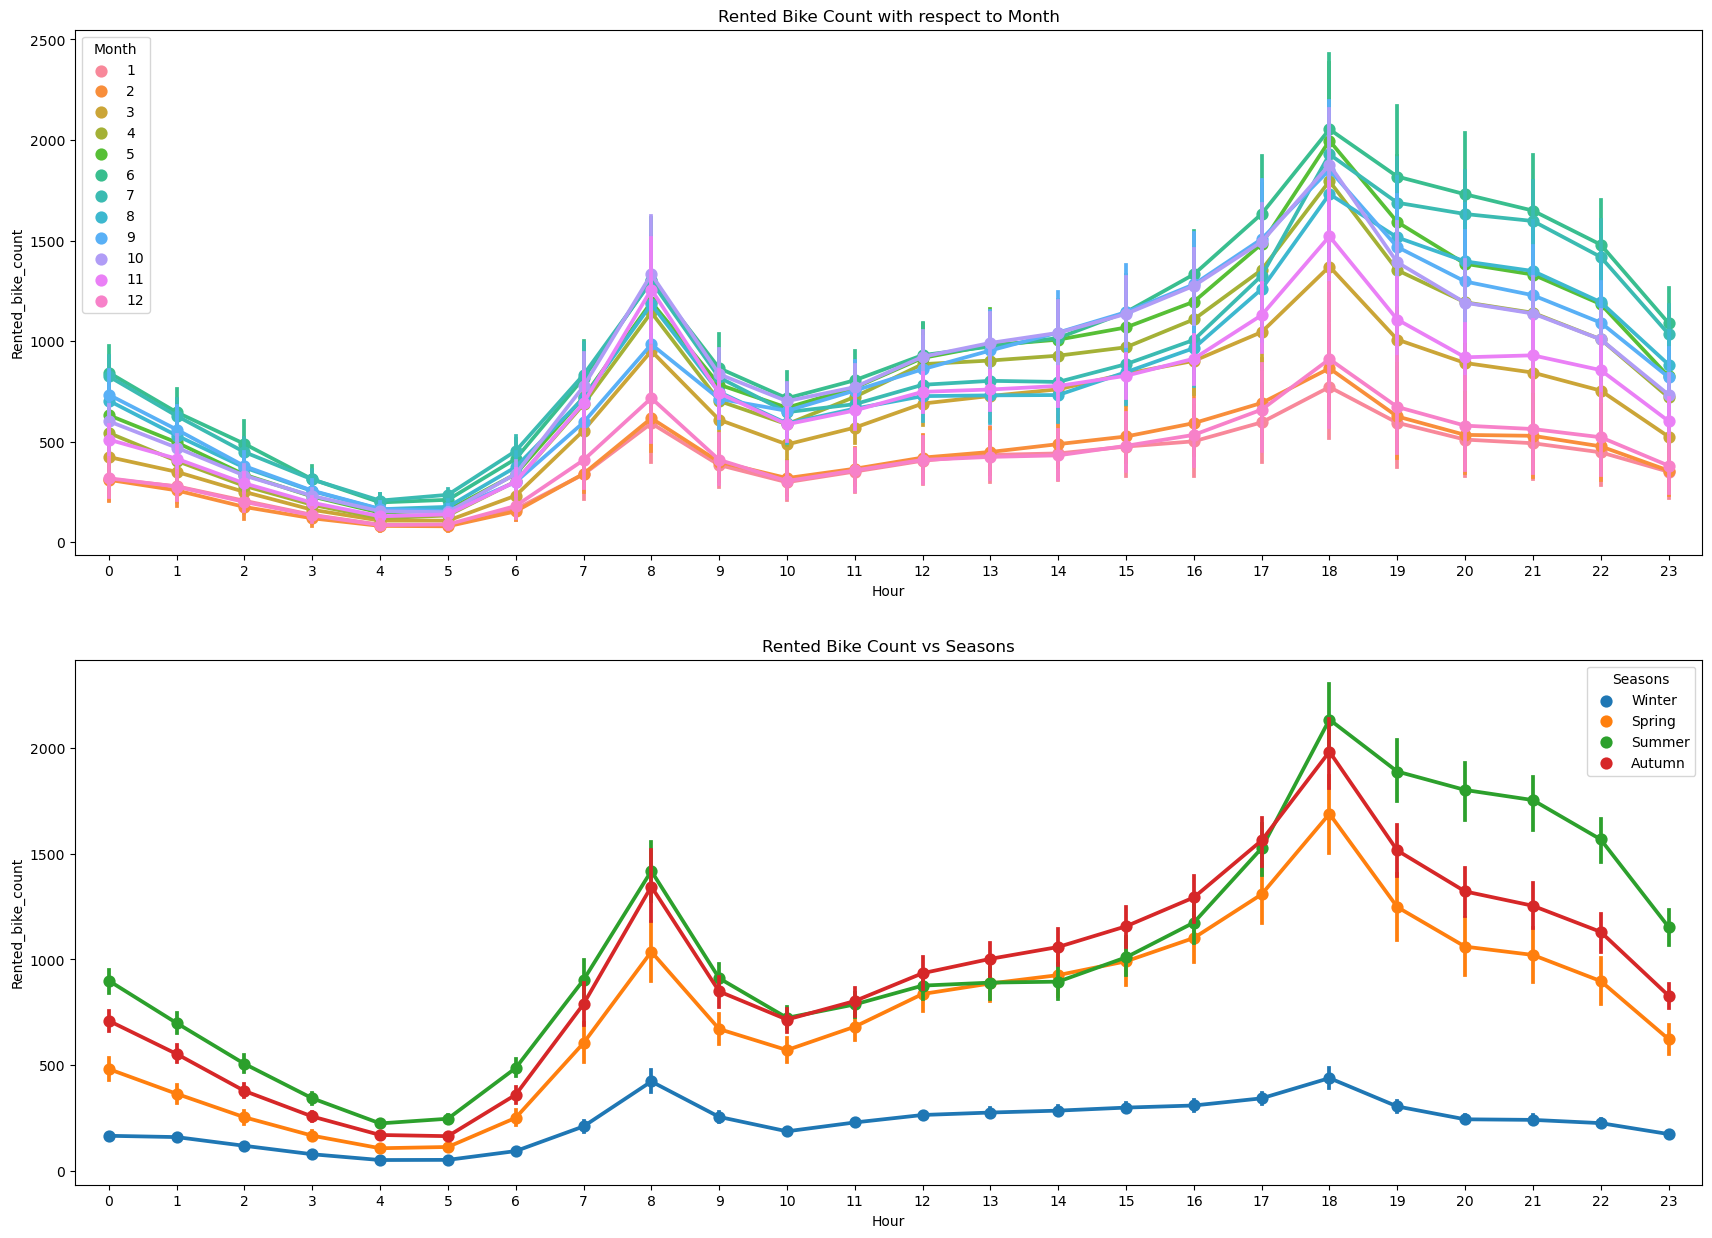

In [112]:

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(21,15))
sns.pointplot(x='Hour',y='Rented_bike_count',hue='Month',data = dataset,ax=ax1)
ax1.set(title ='Rented Bike Count with respect to Month')

sns.pointplot(x='Hour',y='Rented_bike_count',hue='Seasons',data = dataset,ax=ax2)
ax2.set(title ='Rented Bike Count vs Seasons')
plt.show()


**Observation:** In chart above we can see that demands for rental bike is very low during December,January,February which is season of winter.Demand for bikes is high during April to August which is during the summer season. 

#### 6.Demands for bike during each season

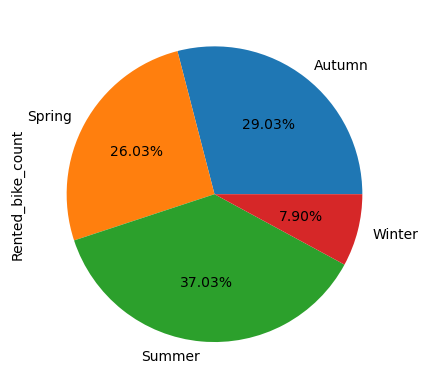

In [113]:

dataset.groupby('Seasons').sum()['Rented_bike_count'].plot.pie(autopct="%.2f%%")
plt.show()


**Observation:** As we can see above that bike renting is very less during winter time and highest during summer time.

#### 7.Changes in demand with changes in weather conditions

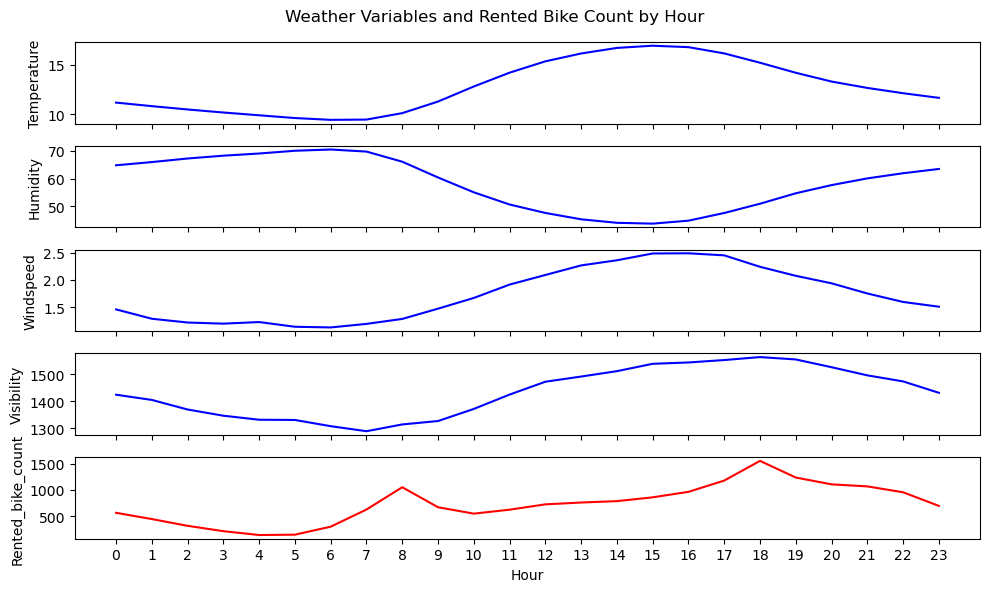

In [114]:

weather_eff=dataset.groupby('Hour')[['Temperature','Humidity','Windspeed','Visibility','Rented_bike_count']].mean()
weather_eff

features = ['Temperature', 'Humidity', 'Windspeed', 'Visibility','Rented_bike_count']

# Creating subplots
fig, axes = plt.subplots(len(features), 1, figsize=(10, 6), sharex=True)

# Looping through features and plotting subplots
for i, feature in enumerate(features):
    ax = axes[i]
    if feature == 'Rented_bike_count':
        sns.lineplot(data=weather_eff, x='Hour', y=feature, ax=ax, color='red')
    else:
        sns.lineplot(data=weather_eff, x='Hour', y=feature, ax=ax, color='blue')
    ax.set_ylabel(feature)
    ax.set_xticks(weather_eff.index)
    
axes[-1].set_xlabel('Hour')
plt.suptitle('Weather Variables and Rented Bike Count by Hour')
plt.tight_layout()
plt.show()


**Observation:** 
- Demand for bikes is directly proportional to the change in weather conditions of Temperature,Windspeed and Visibility.Which means the as these conditions changes from high to low,the demand also changes from high to low.
- When Humidity in surroundings is higher we see low demand for bike rentals.As temperature in Seoul region is 10 to 20 degree C,we can assume that temperature changes are unlikely to affect the Humidity in air as in other parts of world.

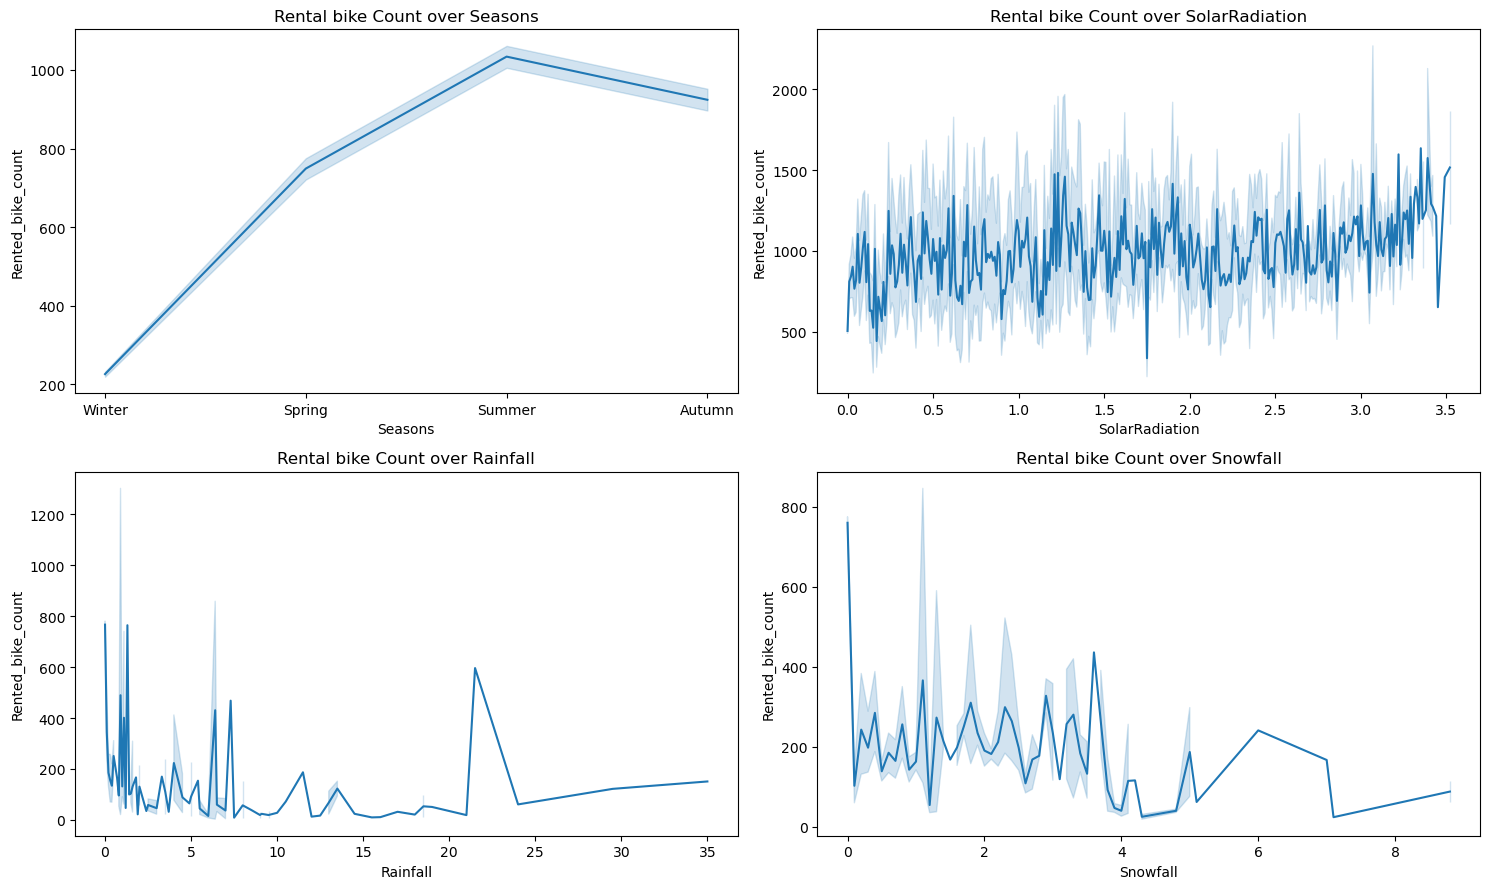

In [115]:

cat_columns=['Seasons','SolarRadiation','Rainfall','Snowfall']
n=1
plt.figure(figsize=(15,9))
for i in cat_columns:
  plt.subplot(2,2,n)
  n=n+1
  sns.lineplot(x=dataset[i],y=dataset['Rented_bike_count'])
  plt.title(f"Rental bike Count over {i}")
  plt.tight_layout()
plt.show()


**Observation:** From the chart above we can see that the count of bike demand reduces as there is more rainfall or snowfall.But the solar radiation does not affect the demand with high range.


### Distribution of the target feature

<Axes: xlabel='Rented_bike_count', ylabel='Density'>

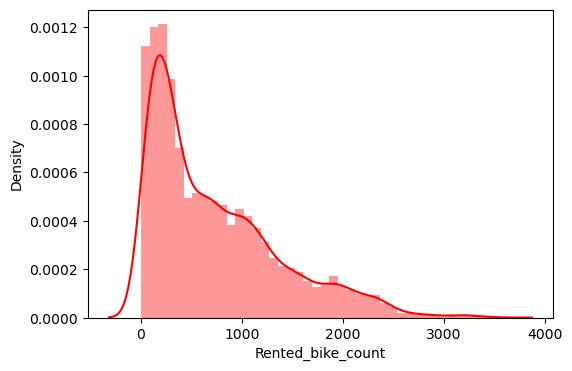

In [116]:
# distribution plot of target feature
plt.figure(figsize=(6,4))
sns.distplot(dataset['Rented_bike_count'],color='r')

**Observation:** The target feature 'Rented_bike_count' is positively skewed.So we have to use normalization techniques.

### Distribution of all features in dataset 

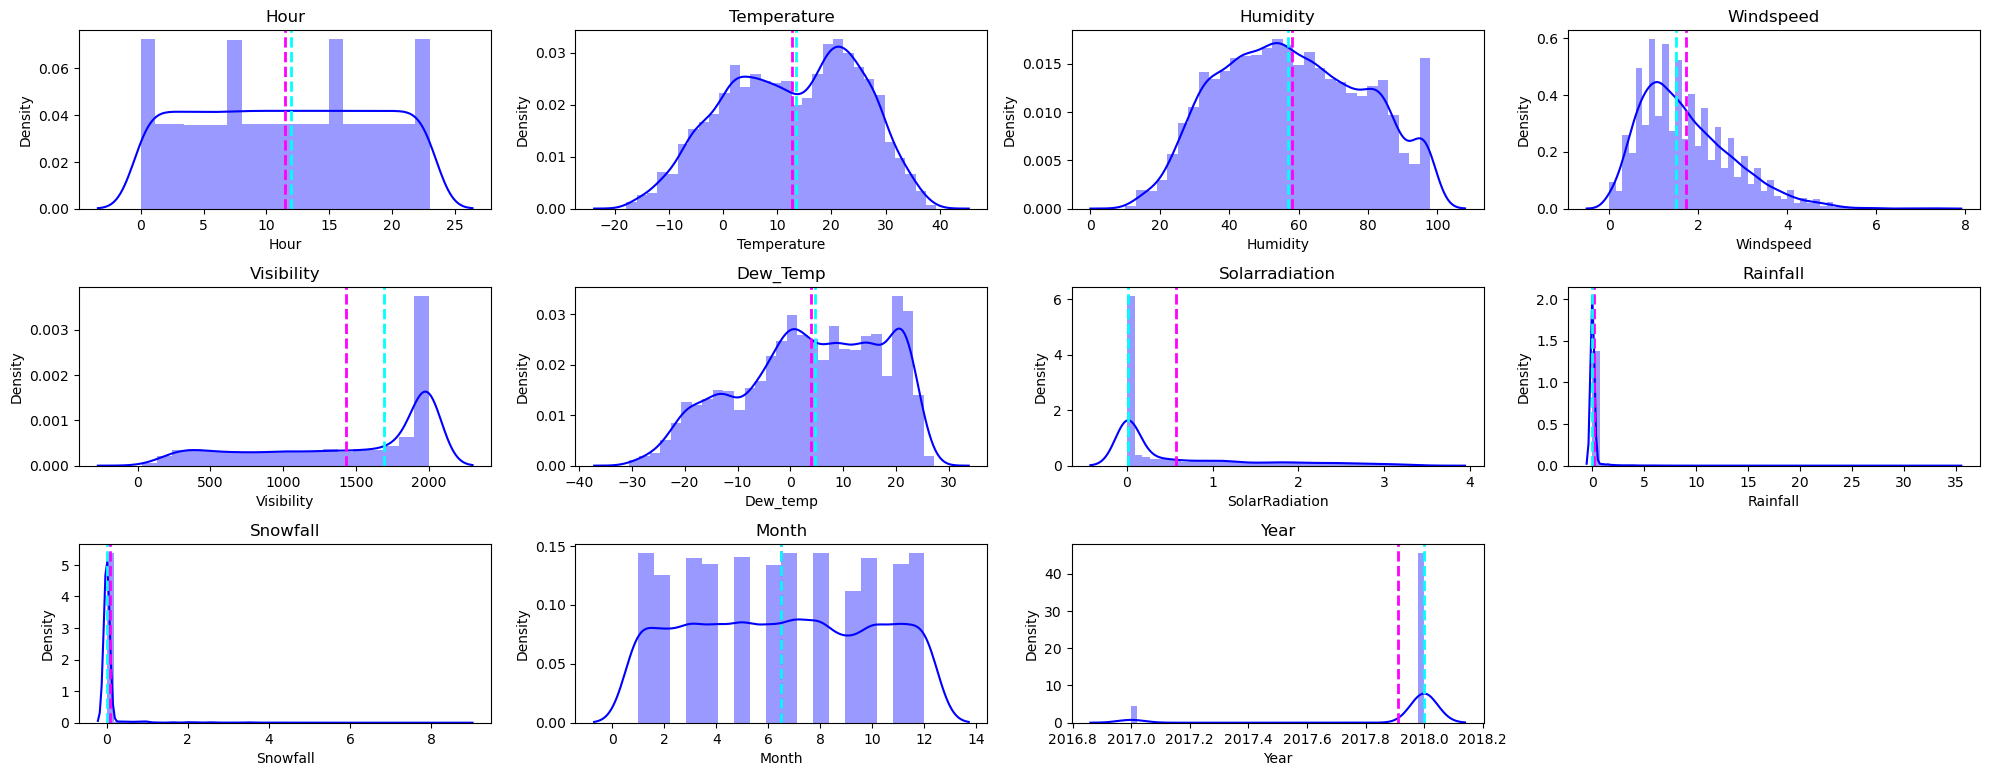

In [117]:
numerical_features = dataset.describe().columns

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(numerical_features[1:]) :
  plt.subplot(4,4,index+1)
  sns.distplot(dataset[column],color='b')
  feature = dataset[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)  
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.title(f'{column.title()}')
  plt.tight_layout()


**Observation:** 
- 'Windspeed' is positively skewed.
- 'Visibility' is highly negatively skewed.
- Features 'SolarRadiation','Rainfall' and 'Snowfall' are highly positively skewed but cannot be normalized.

### Outlier detection

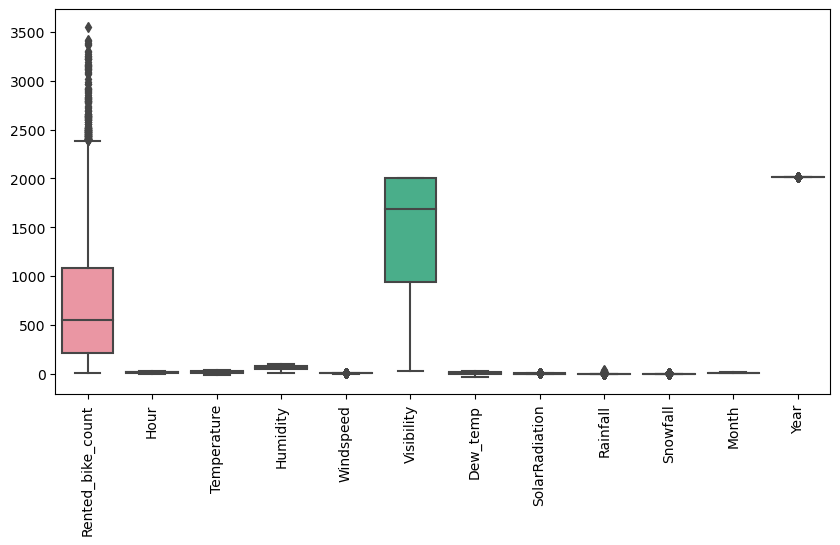

In [118]:
plt.figure(figsize=(10,5))   
plt.xticks(rotation =90)     
sns.boxplot(data =dataset)   
plt.show()

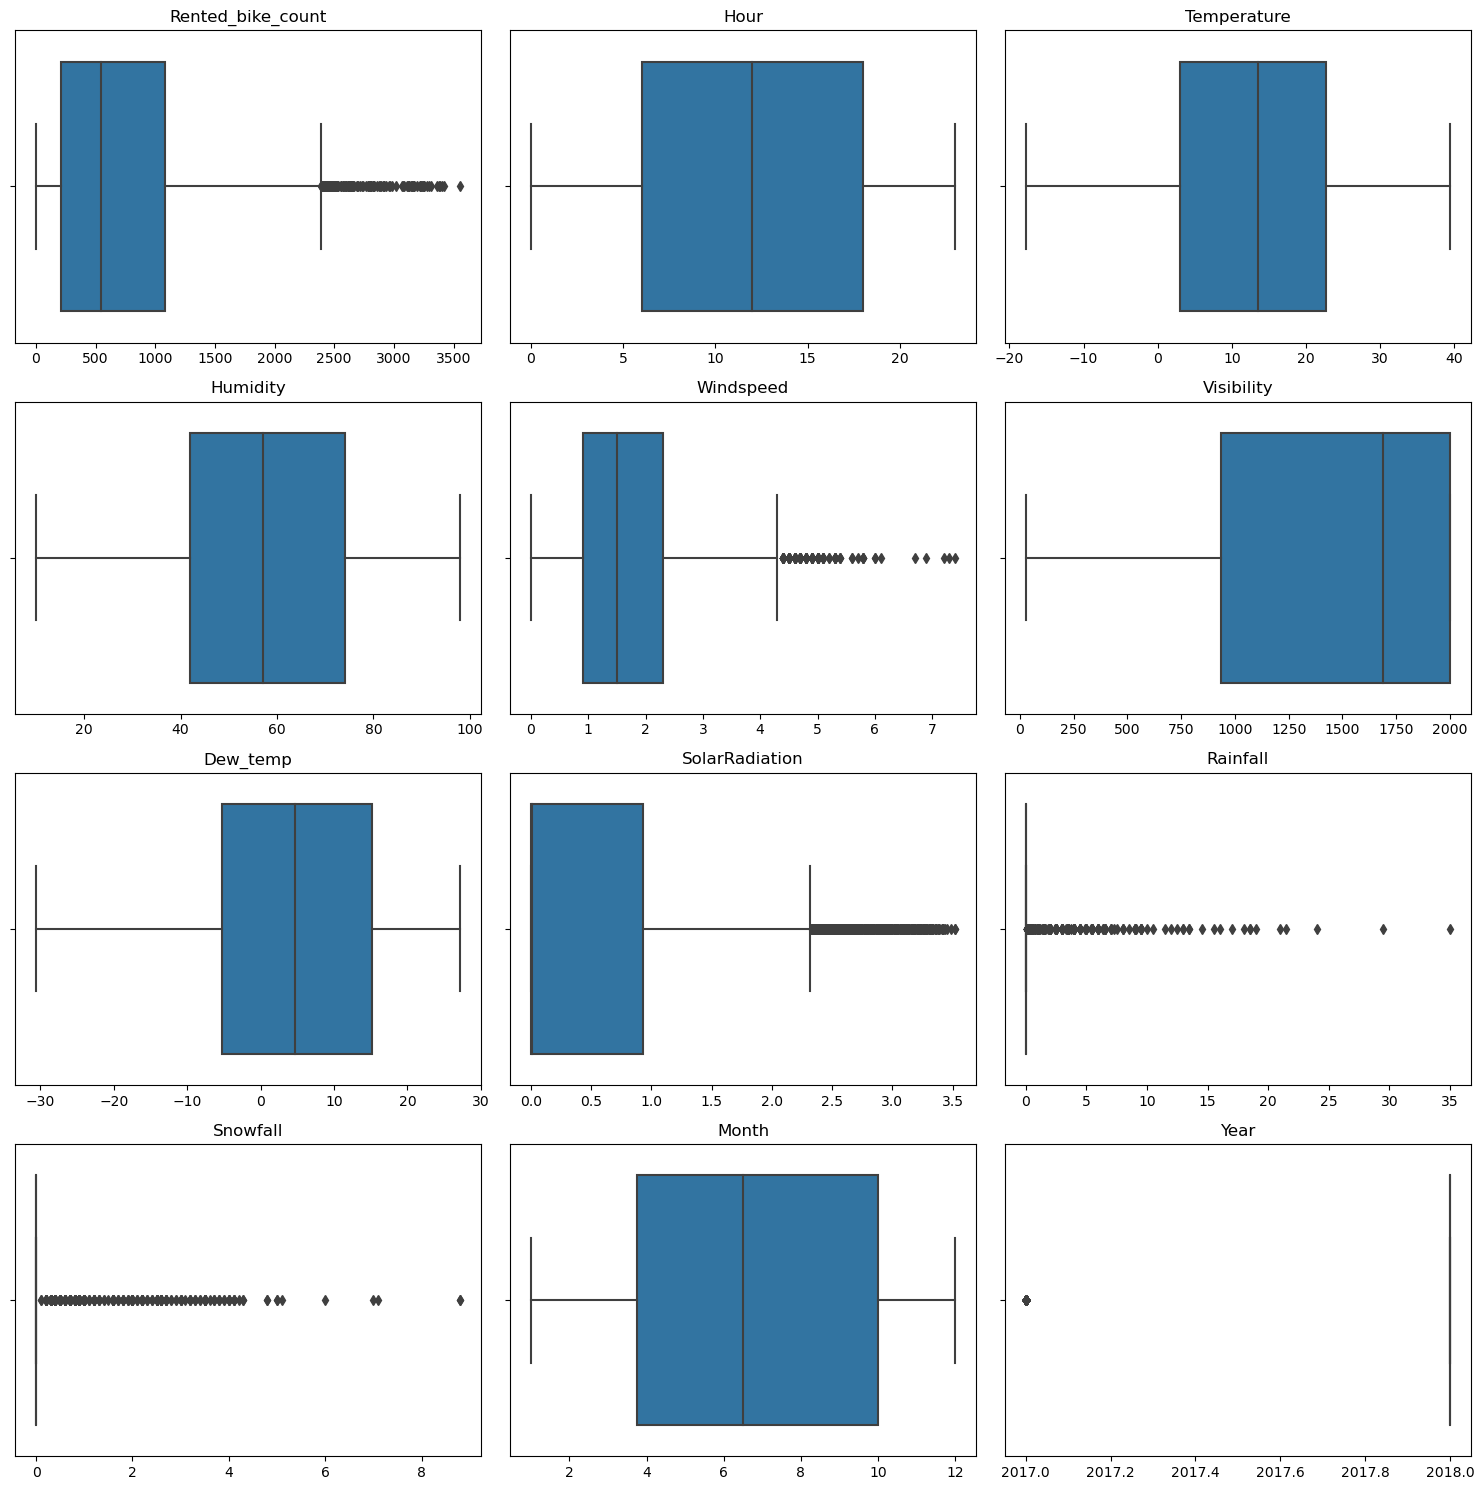

In [119]:
features = numerical_features

fig, axes = plt.subplots(4,3, figsize=(15,15))
axes = axes.flatten()
for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(data=dataset, x=feature, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        axes[j].axis('off')    

plt.tight_layout()
plt.show()


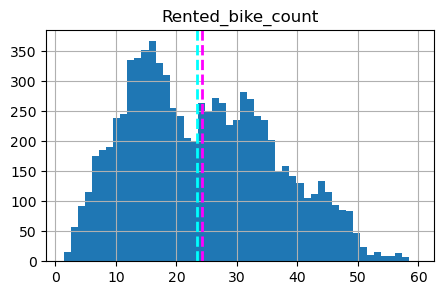

In [120]:
for col in numerical_features[[0]]:
    fig = plt.figure(figsize=(5,3))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Correlation between Target feature and remaining features

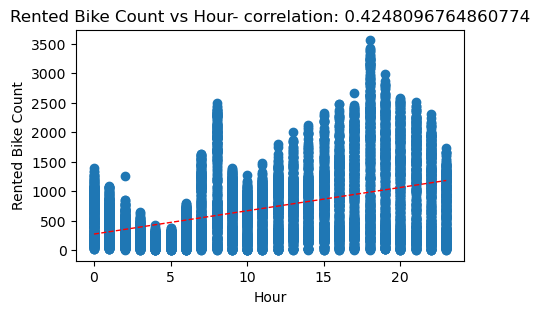

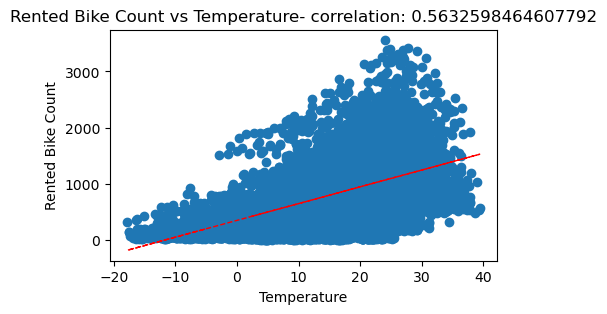

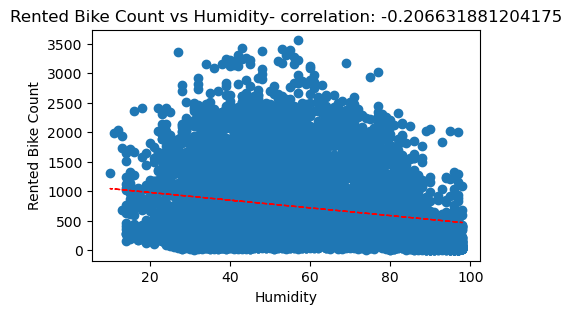

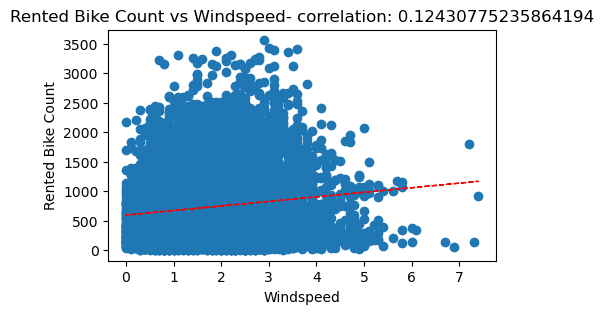

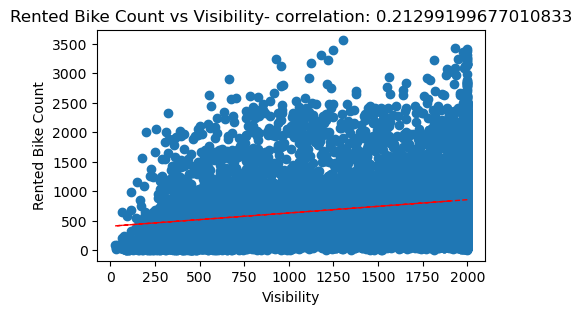

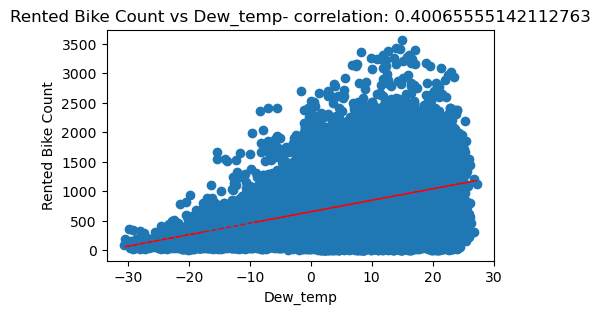

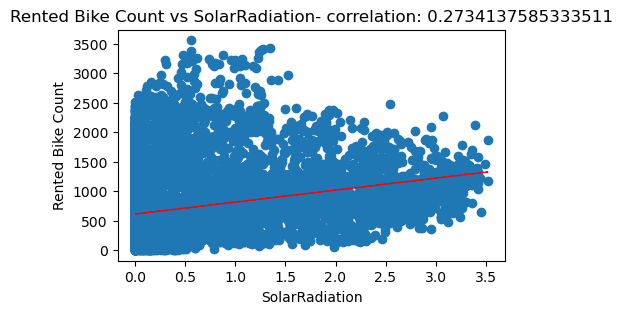

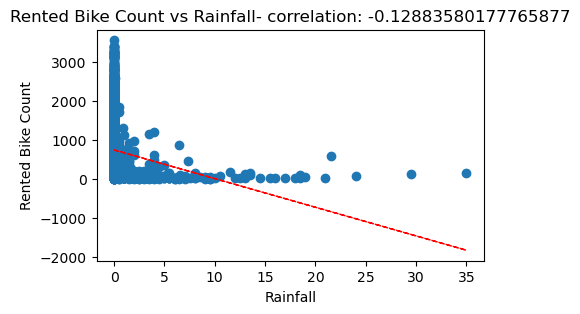

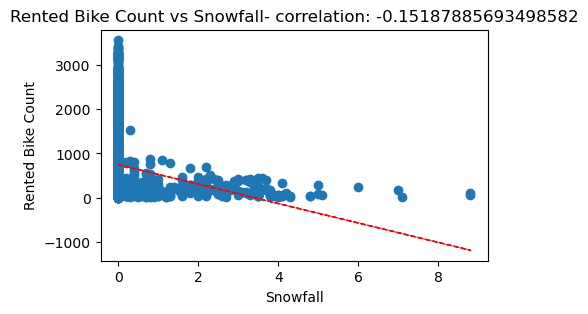

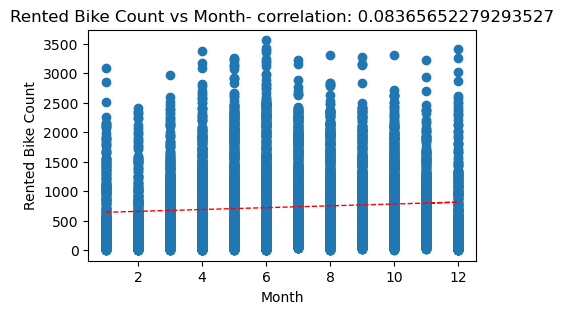

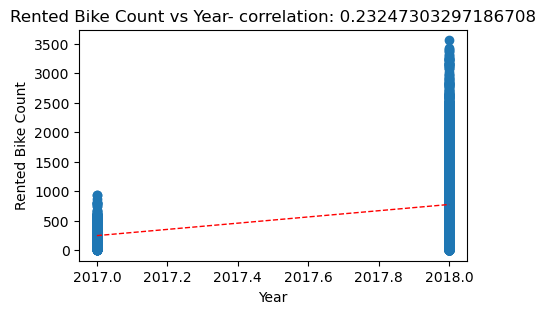

In [121]:
for col in numerical_features[1:]:
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented_bike_count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented_bike_count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

From the correlation plots above we can say that on first observation,that features such as 'Hour','Temperature','Windspeed','Visibility','Dew_temp' and 'SolarRadiation' are in positive correlation with the target feature.
While other features like 'Humidity','Rainfall' and 'Snowfall' are in negative correlation with the target feature.

### Categorical variables

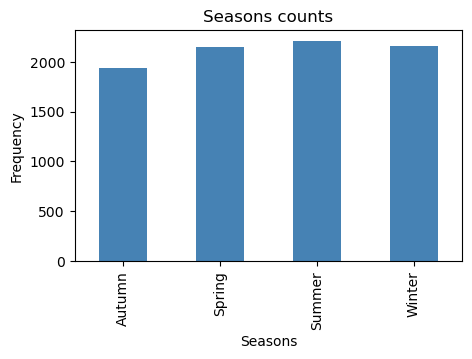

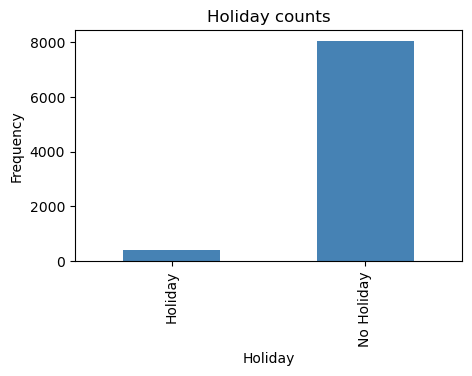

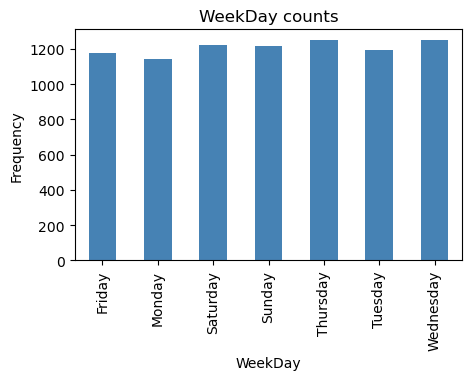

In [122]:
categorical_features = dataset.describe(include=['object','category']).columns
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

From the Barplots above,we can see that categorical variables of 'Seasons' and 'Weekday' are evenly distributed.Although the count of bike rentals may vary depending on each season and weekday,there is no imbalance in categorical variables.
For most bike rentals are demanded on non-holidays,we see very less demand on holidays.

### Correlation Heatmap

<Axes: >

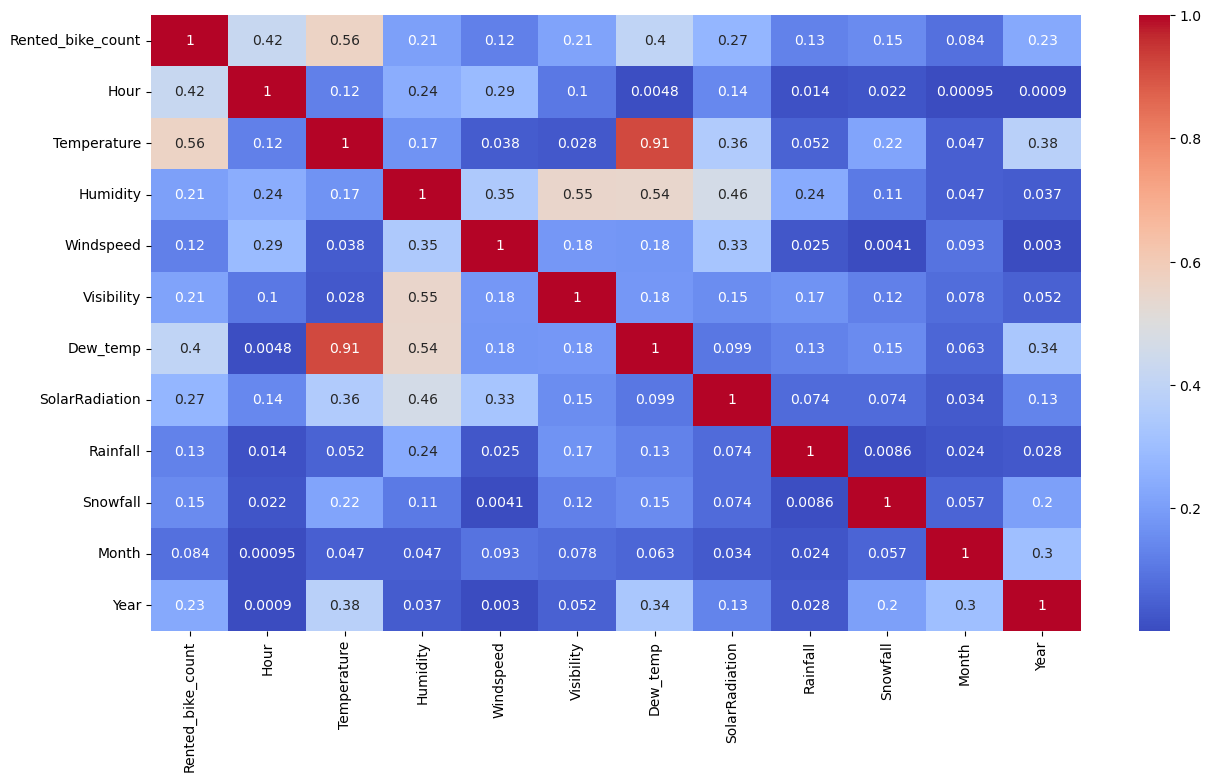

In [123]:
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

feature 'Dew_temp' and 'Temperature' in data are highly coorelated so we will drop the 'Dew_temp' column from data 

In [124]:
dataset.drop(columns=['Dew_temp'],inplace=True) 

In [125]:
numerical_features=['Hour','Temperature','Humidity','Windspeed','Visibility','SolarRadiation','Rainfall','Snowfall','Month','Year']

### Data Encoding

In [126]:
dataset= pd.get_dummies(dataset, columns=['Seasons'],prefix='Is')
dataset=dataset.replace({'Holiday':{'Holiday':1, 'No Holiday':0}})

In [127]:
all_features = list(numerical_features)  # Convert Index to list
all_features.extend(['Holiday', 'Is_Autumn', 'Is_Spring', 'Is_Summer', 'Is_Winter'])


### Checking for Multicollinearity

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [129]:
calc_vif(dataset[[i for i in dataset[all_features] if i not in ['Windspeed','Year','Is_Summer','Is_Winter']]])

,variables,VIF
0,Hour,3.556137
1,Temperature,3.072831
2,Humidity,6.447873
3,Visibility,4.838654
4,SolarRadiation,2.029175
5,Rainfall,1.083185
6,Snowfall,1.149136
7,Month,5.215281
8,Holiday,1.055068
9,Is_Autumn,1.607227


<Axes: >

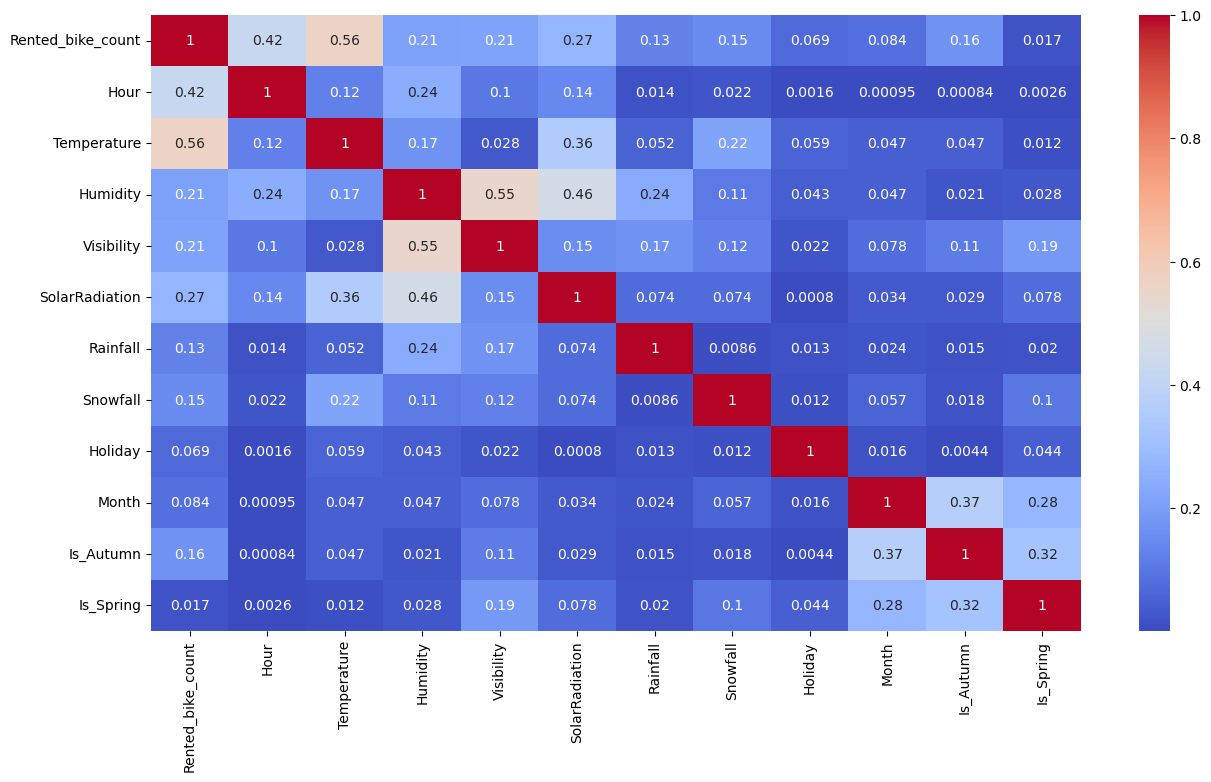

In [130]:
plt.figure(figsize=(15,8))
dataset.drop(columns=['Windspeed','Is_Summer', 'Is_Winter','Year'],inplace=True) 
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [131]:
from scipy.stats import zscore
#scaler=MinMaxScaler()

variables_to_delete = ['Windspeed','Is_Summer', 'Is_Winter','Year']
for variable in variables_to_delete:
    all_features.remove(variable)


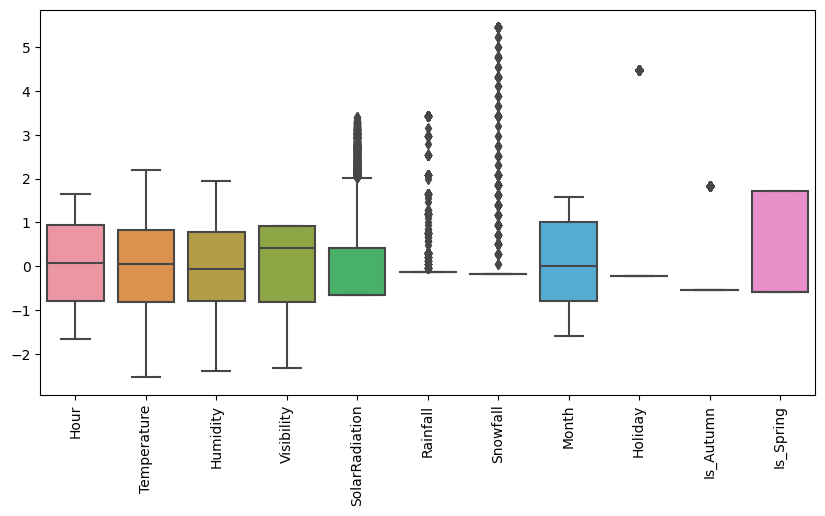

In [132]:

#X = scaler.fit_transform(dataset[all_features])
X= dataset[all_features].apply(zscore)


for col in ['Rainfall','Snowfall']:
    upper_limit = X[col].quantile(0.99)
    X[col] = np.where( X[col] > upper_limit, upper_limit,X[col])

plt.figure(figsize=(10,5))   
plt.xticks(rotation =90)     
sns.boxplot(data =X )    
plt.show()

In [133]:
y=np.sqrt(dataset['Rented_bike_count'])

In [134]:
#Train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6758, 11)
(1690, 11)


### linear regression

In [135]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [136]:
reg.score(X_train, y_train)

0.6329597845120505

In [137]:
reg.coef_

array([ 3.48549588,  7.43763846, -2.9614181 , -0.02364146, -0.81748882,
       -5.75180703,  0.08230543,  0.39553206, -0.6650974 ,  2.06797186,
        1.17662182])

In [138]:
y_pred = reg.predict(X_test)

In [139]:
MSE  = mean_squared_error((y_test)**2,(y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 171493.36222011427
RMSE : 414.1175705281222


In [140]:
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5867752369449852
Adjusted R2 :  0.5840663737783552


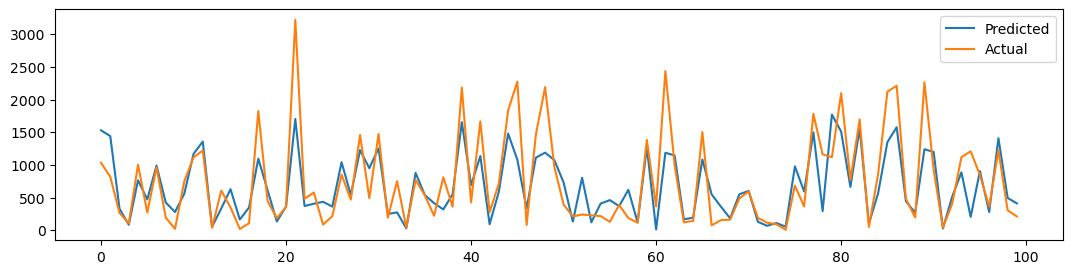

In [141]:
plt.figure(figsize=(13,3))
plt.plot(((y_pred)**2)[:100])
plt.plot(np.array(((y_test)**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

### Lasso Regression

In [142]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [143]:
lasso.score(X_train, y_train)

0.6329408347721657

In [144]:
y_pred_l = lasso.predict(X_test)

In [145]:
MSE  = mean_squared_error((y_test)**2,(y_pred_l)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_l)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_l)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 171850.0223965936
RMSE : 414.54797357675454
R2 : 0.5859158403187318
Adjusted R2 :  0.5832013434435864


In [146]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [147]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -51.7074297384263


In [148]:
# Use best parameters to create XGBoost regressor
lasso_regressor= Lasso(**lasso_regressor.best_params_)

# Fit the XGBoost regressor with best parameters
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.01)

In [149]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [150]:
MSE  = mean_squared_error((y_test)**2,(y_pred_lasso)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_lasso)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_lasso)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 171850.0223965936
RMSE : 414.54797357675454
R2 : 0.5859158403187318
Adjusted R2 :  0.5832013434435864


### Ridge Regression

In [151]:
ridge  = Ridge(alpha=0.1)

In [152]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [153]:
ridge.score(X_train, y_train)

0.6329597839958532

In [154]:
y_pred_r = ridge.predict(X_test)

In [155]:
MSE  = mean_squared_error((y_test)**2,(y_pred_r)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_r)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_r)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 171495.2364380341
RMSE : 414.1198334275166
R2 : 0.5867707208911519
Adjusted R2 :  0.5840618281198782


In [156]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [157]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -51.71226228167269


In [158]:
# Use best parameters to create XGBoost regressor
ridge_regressor =Ridge(**ridge_regressor.best_params_)

# Fit the XGBoost regressor with best parameters
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=1)

In [159]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [160]:
MSE  = mean_squared_error((y_test)**2,(y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 171512.10759979268
RMSE : 414.1402028296609
R2 : 0.5867300686948809
Adjusted R2 :  0.5840209094312597


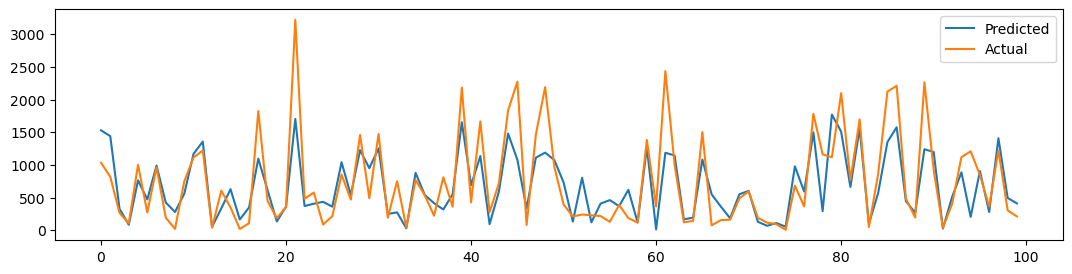

In [161]:
plt.figure(figsize=(13,3))
plt.plot(((y_pred_ridge)**2)[:100])
plt.plot(np.array(((y_test)**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

### ElasticNet Regression

In [162]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [163]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [164]:
elasticnet.score(X_train, y_train)

0.6270798985068674

In [165]:
y_pred_en = elasticnet.predict(X_test)

In [166]:
MSE  = mean_squared_error((y_test)**2,(y_pred_en)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_en)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_en)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 180188.70008692663
RMSE : 424.48639564410854
R2 : 0.5658232369189725
Adjusted R2 :  0.5629770245269039


In [167]:
elastic = ElasticNet()
parameters = {'alpha': [1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 30,
                                   40, 45, 50, 55, 60, 100],
                         'l1_ratio': [0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [168]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -51.710324189693644


In [169]:
# Use best parameters to create XGBoost regressor
elastic_regressor=  ElasticNet(**elastic_regressor.best_params_)

# Fit the XGBoost regressor with best parameters
elastic_regressor.fit(X_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.8)

In [170]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [171]:
MSE  = mean_squared_error((y_test)**2,(y_pred_elastic)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_elastic)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_elastic)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 172039.05193982614
RMSE : 414.77590568863343
R2 : 0.5854603609508924
Adjusted R2 :  0.5827428782157671


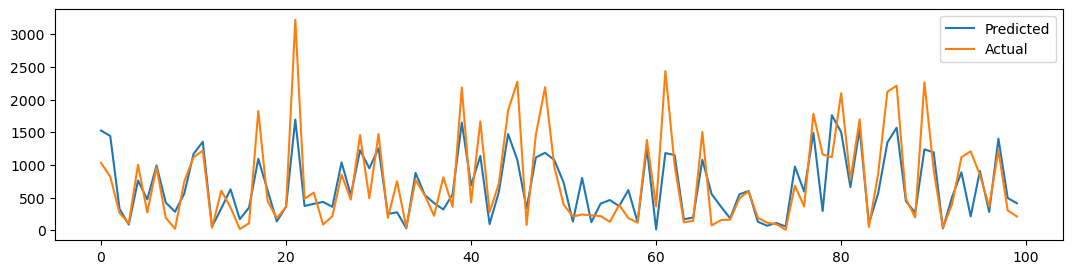

In [172]:
plt.figure(figsize=(13,3))
plt.plot(((y_pred_elastic)**2)[:100])
plt.plot(np.array(((y_test)**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

### Decision Tree Regressor

In [173]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [174]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
y_pred_dt=DTR.predict(X_test)
print('Score :',DTR.score(X_train, y_train))
MSE  = mean_squared_error((y_test)**2,(y_pred_dt)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_dt)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_dt)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Score : 0.9999988151919466
MSE : 91462.25398320329
RMSE : 302.42727056798844
R2 : 0.7796155621336702
Adjusted R2 :  0.7781708488937837


In [175]:
dtparameters = {'criterion':['mse','squared_error', 'absolute_error',],
              'min_samples_leaf':[5],#6,7,8],
              'max_depth' : [15],#10,20],
              'min_samples_split': [25],#20],
             }
D_tree = GridSearchCV(DTR,param_grid=dtparameters,cv=5,n_jobs=-1)
D_tree.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,D_tree.best_params_)
print("\nUsing ",D_tree.best_params_, " the negative mean squared error is: ", D_tree.best_score_)

The best fit alpha value is found out to be : {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 25}

Using  {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 25}  the negative mean squared error is:  0.8332037869919633


MSE : 66220.63809717233
RMSE : 257.3337096013119
R2 : 0.8404369292618229
Adjusted R2 :  0.8393909258183665


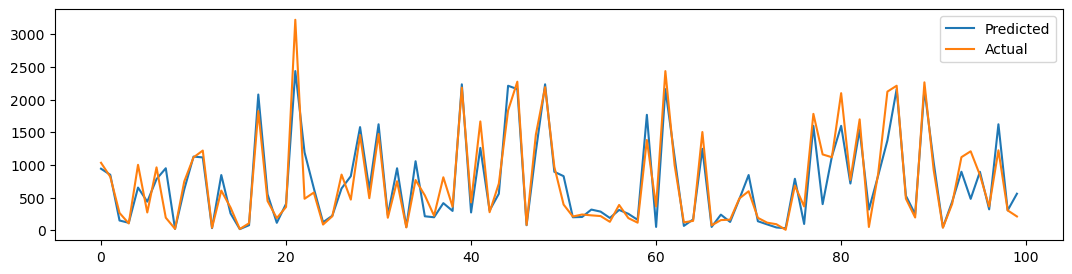

In [176]:
# Use best parameters to create XGBoost regressor
D_tree= DecisionTreeRegressor(**D_tree.best_params_)

# Fit the XGBoost regressor with best parameters
D_tree.fit(X_train, y_train)
y_pred_dtr = D_tree.predict(X_test)

MSE  = mean_squared_error((y_test)**2,(y_pred_dtr)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_dtr)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_dtr)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
plt.figure(figsize=(13,3))
plt.plot(((y_pred_dtr)**2)[:100])
plt.plot(np.array(((y_test)**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

### Random Forest Regressor

In [177]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
y_pred_rf=RFR.predict(X_test)
print('Score :',RFR.score(X_train, y_train))
MSE  = mean_squared_error((y_test)**2,(y_pred_rf)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_rf)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_rf)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Score : 0.984177406407799
MSE : 46671.18491061437
RMSE : 216.03514739646965
R2 : 0.8875426484353841
Adjusted R2 :  0.8868054429126125


In [178]:
rfparameters = {
              'n_estimators':[110],
              'min_samples_leaf':[1],
              'max_depth' : [17],
              'min_samples_split': [2],
              'min_weight_fraction_leaf':[0.0],
              'max_features':[0.8]
    
               }
R_forest = GridSearchCV(RFR,param_grid=rfparameters,cv=5,n_jobs=-1)
R_forest.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,R_forest.best_params_)
print("\nUsing ",R_forest.best_params_, " the negative mean squared error is: ", R_forest.best_score_)

The best fit alpha value is found out to be : {'max_depth': 17, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 110}

Using  {'max_depth': 17, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 110}  the negative mean squared error is:  0.8863500323326841


In [179]:
# Use best parameters to create XGBoost regressor
R_forest= RandomForestRegressor(**R_forest.best_params_)

# Fit the XGBoost regressor with best parameters
R_forest.fit(X_train, y_train)
y_pred_rfr = R_forest.predict(X_test)
MSE  = mean_squared_error((y_test)**2,(y_pred_rfr)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_rfr)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_rfr)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 45407.64761017616
RMSE : 213.0907027774233
R2 : 0.890587226341056
Adjusted R2 :  0.8898699793146863


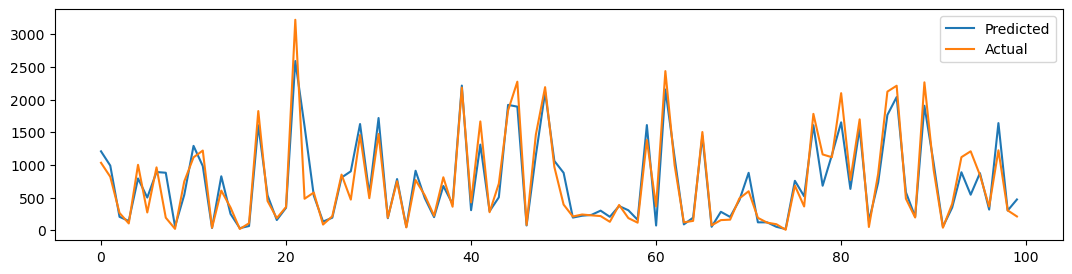

In [180]:
plt.figure(figsize=(13,3))
plt.plot(((y_pred_rfr)**2)[:100])
plt.plot(np.array(((y_test)**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

### XGBoost Regressor

In [181]:
XGB=GradientBoostingRegressor()
XGB.fit(X_train,y_train)
y_pred_xg=XGB.predict(X_test)
print('Score :',XGB.score(X_train, y_train))
MSE  = mean_squared_error((y_test)**2,(y_pred_xg)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_xg)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_xg)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Score : 0.8803975338091297
MSE : 56870.423861969226
RMSE : 238.4752059690257
R2 : 0.8629668978380776
Adjusted R2 :  0.862068587871581


In [182]:
xgbparameters={           
            'n_estimators':[500], 
            'learning_rate': [0.14], 
            'max_depth':[7],
              }
            
XG_Boost = GridSearchCV(XGB,param_grid=xgbparameters,cv=5,n_jobs=-1,verbose=2)
XG_Boost.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,XG_Boost.best_params_)
print("\nUsing ",XG_Boost.best_params_, " the negative mean squared error is: ", XG_Boost.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best fit alpha value is found out to be : {'learning_rate': 0.14, 'max_depth': 7, 'n_estimators': 500}

Using  {'learning_rate': 0.14, 'max_depth': 7, 'n_estimators': 500}  the negative mean squared error is:  0.8924590552642335


In [183]:
# Use best parameters to create XGBoost regressor
XG_Boost = GradientBoostingRegressor(**XG_Boost.best_params_)

# Fit the XGBoost regressor with best parameters
XG_Boost.fit(X_train, y_train)
y_pred_xgb = XG_Boost.predict(X_test)
MSE  = mean_squared_error((y_test)**2,(y_pred_xgb)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_xgb)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_xgb)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 42571.135021681046
RMSE : 206.32773691794577
R2 : 0.8974219937461002
Adjusted R2 :  0.8967495515120163


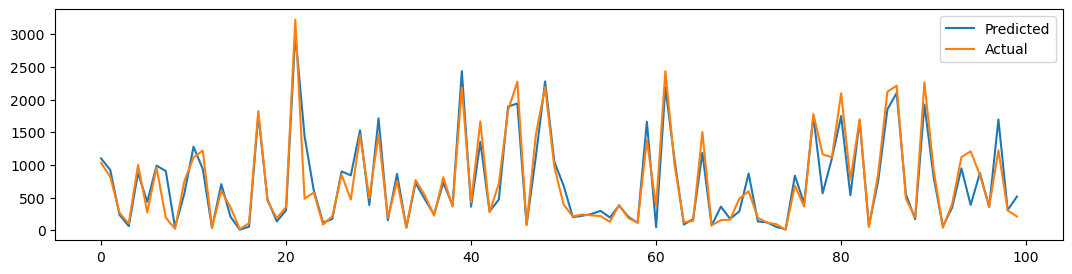

In [184]:
plt.figure(figsize=(13,3))
plt.plot(((y_pred_xgb)**2)[:100])
plt.plot(np.array(((y_test)**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [185]:
models = [
    ('Linear Regression', reg),
    ('Lasso', lasso_regressor),
    ('Ridge', ridge_regressor),
    ('ElasticNet', elastic_regressor),
    ('Decision Tree', D_tree),
    ('Random Forest', R_forest),
    ('XGBoost', XG_Boost)
]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2', 'Adjusted R2'])

# Loop through each model
for model_name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate adjusted R2
    n = len(X_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    # Append results to DataFrame
    results_df = results_df.append({'Model': model_name,
                                    'MSE': mse,
                                    'RMSE': rmse,
                                    'R2': r2,
                                    'Adjusted R2': adjusted_r2},
                                   ignore_index=True)

# Print results in tabular form
print(results_df)

               Model        MSE      RMSE        R2  Adjusted R2
0  Linear Regression  50.245642  7.088416  0.646003     0.643682
1              Lasso  50.252137  7.088874  0.645957     0.643636
2              Ridge  50.245927  7.088436  0.646001     0.643680
3         ElasticNet  50.259702  7.089408  0.645904     0.643582
4      Decision Tree  20.220152  4.496682  0.857542     0.856608
5      Random Forest  13.994052  3.740862  0.901407     0.900761
6            XGBoost  13.433659  3.665196  0.905355     0.904735
